In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
 extracting: archive/Train/5/00005_00053_00014.png  
 extracting: archive/Train/5/00005_00053_00015.png  
 extracting: archive/Train/5/00005_00053_00016.png  
 extracting: archive/Train/5/00005_00053_00017.png  
 extracting: archive/Train/5/00005_00053_00018.png  
 extracting: archive/Train/5/00005_00053_00019.png  
 extracting: archive/Train/5/00005_00053_00020.png  
 extracting: archive/Train/5/00005_00053_00021.png  
 extracting: archive/Train/5/00005_00053_00022.png  
 extracting: archive/Train/5/00005_00053_00023.png  
 extracting: archive/Train/5/00005_00053_00024.png  
 extracting: archive/Train/5/00005_00053_00025.png  
 extracting: archive/Train/5/00005_00053_00026.png  
 extracting: archive/Train/5/00005_00053_00027.png  
 extracting: archive/Train/5/00005_00053_00028.png  
 extracting: archive/Train/5/00005_00053_00029.png  
 extracting: archive/Train/5/00005_00054_00000.png  
 extracting: archive/Train/5/00005_00054_00001.p

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

***Summary***

In [ ]:
meta_df = pd.read_csv("/content/archive/Meta.csv")
test_df = pd.read_csv("/content/archive/Test.csv")
train_df = pd.read_csv("/content/archive/Train.csv")
tb_data = {"Images" : ["Classes", "Train", "Test"],  
             "# of Items" : [len(meta_df), len(train_df), len(test_df)]         
    }
tb_report = pd.DataFrame(tb_data, columns=["Images", "# of Items"])
tb_report

,Images,# of Items
0,Classes,43
1,Train,39209
2,Test,12630


***Join 2 csv on classId***

In [ ]:
sign_df = pd.read_csv("/content/archive/Signname.csv")
req_mer = pd.merge(meta_df, sign_df, on="ClassId", how="inner")
req_mer.head()

,Path,ClassId,ShapeId,ColorId,SignId,SignName
0,Meta/27.png,27,0,0,1.32,Pedestrians
1,Meta/0.png,0,1,0,3.29,Speed limit (20km/h)
2,Meta/1.png,1,1,0,3.29,Speed limit (30km/h)
3,Meta/10.png,10,1,0,3.27,No passing for vehicles over 3.5 metric tons
4,Meta/11.png,11,0,0,1.22,Right-of-way at the next intersection


***Plotting images based on classes***

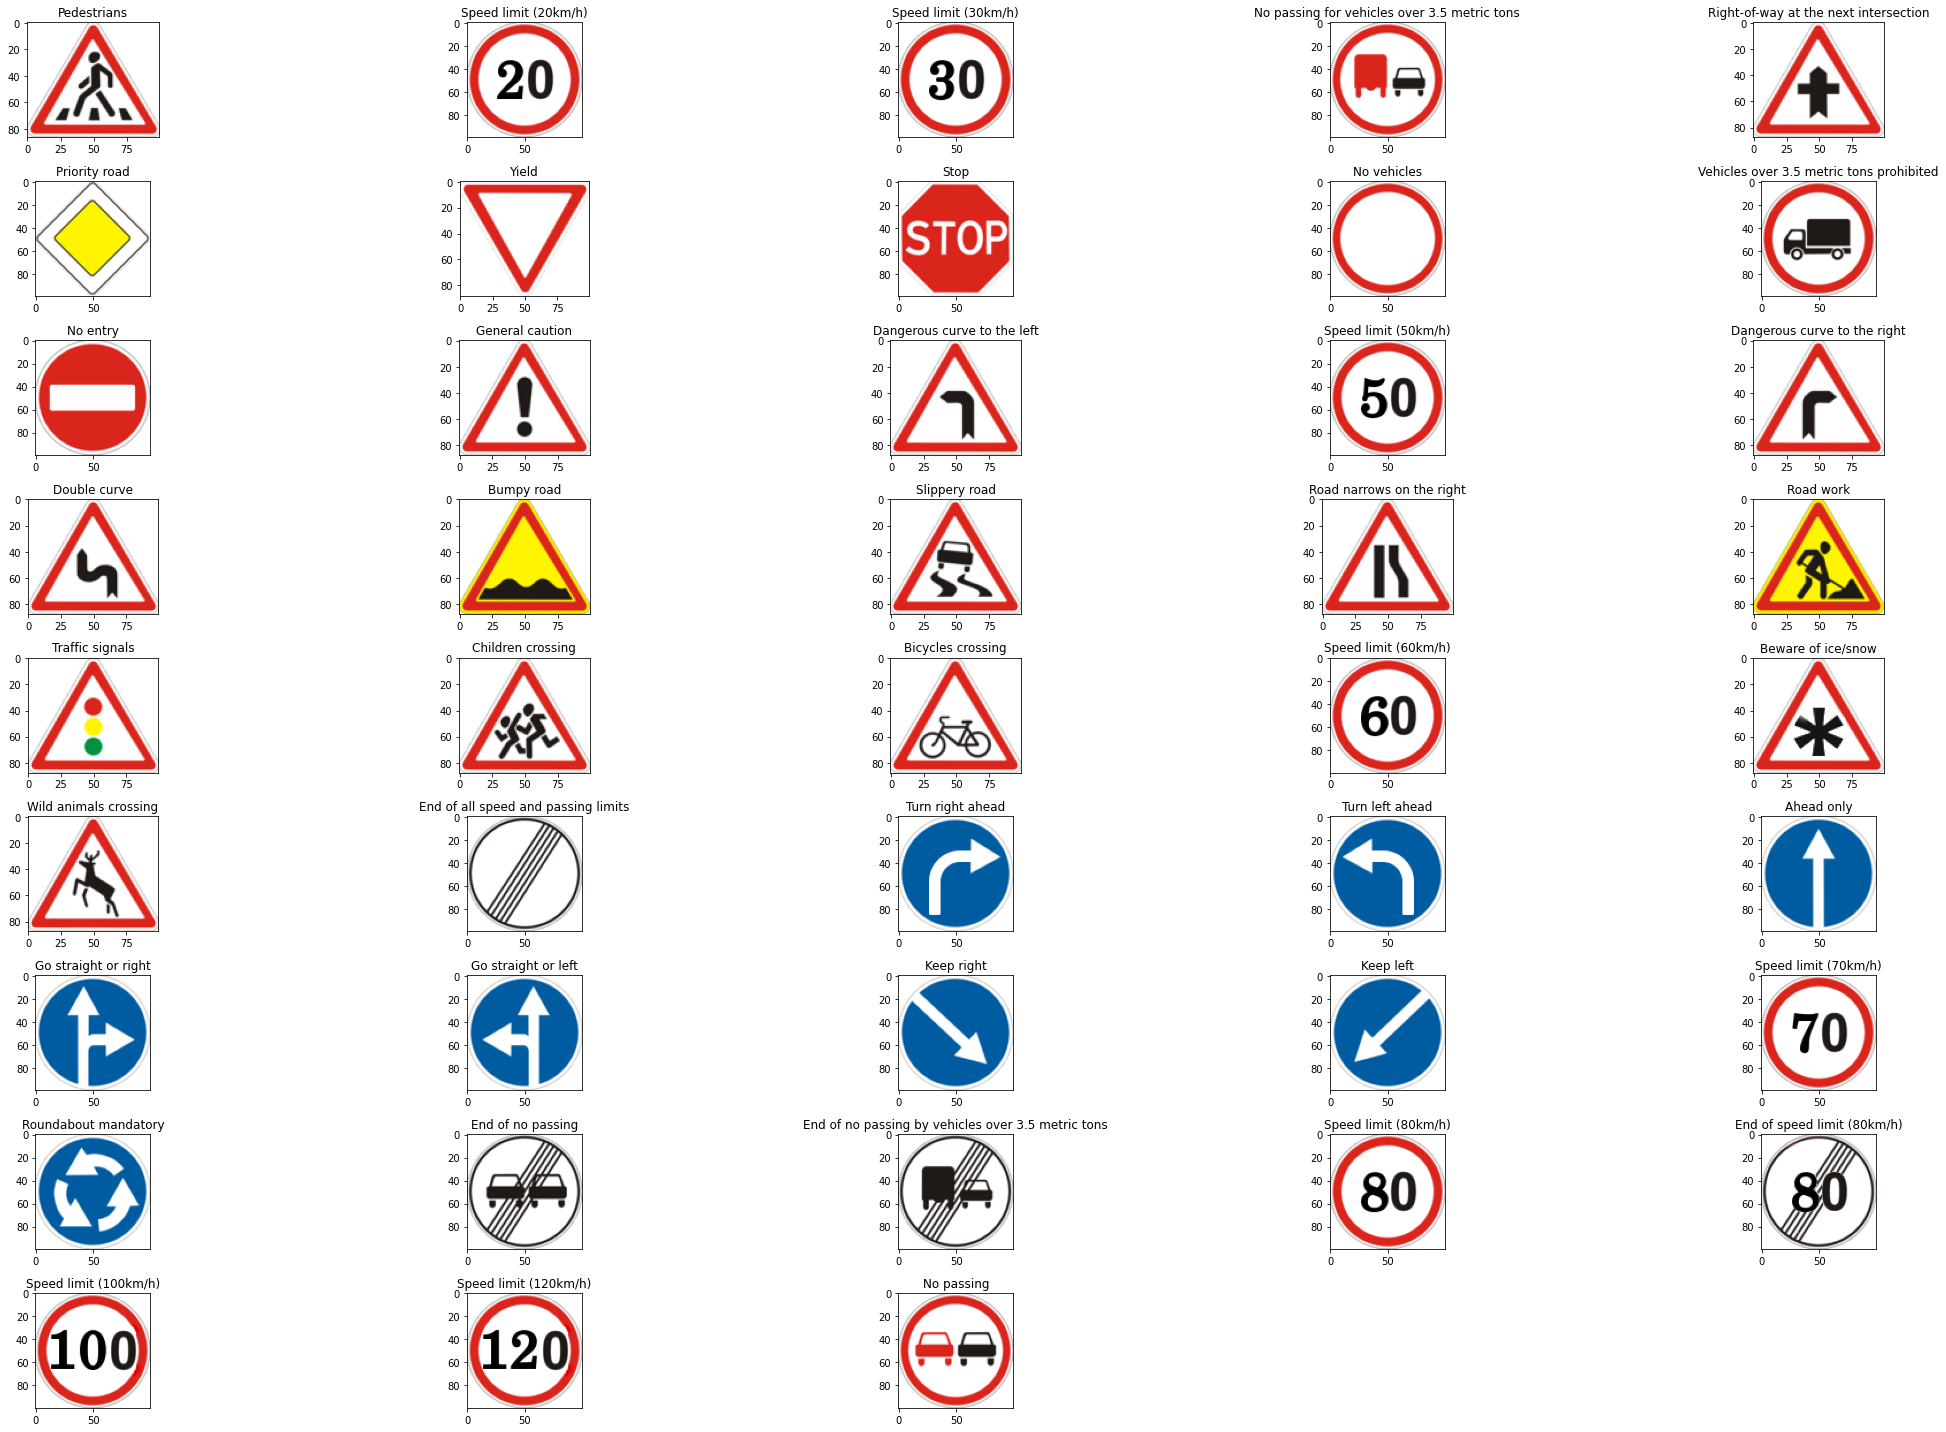

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
images = []
sign_dt = []
for img_path, sign_nm in zip(req_mer["Path"], req_mer["SignName"]):
    images.append(mpimg.imread("/content/archive/"+img_path))
    sign_dt.append(sign_nm)

plt.figure(figsize=(30,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i+1)
    plt.title(f"{sign_dt[i]}")
    plt.tight_layout()
    plt.imshow(image)

***train dataset***

In [ ]:
train_calc = pd.merge(train_df, sign_df, on="ClassId", how="inner")
train_calc

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,SignName
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,Dangerous curve to the right
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,Dangerous curve to the right
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,Dangerous curve to the right
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,Dangerous curve to the right
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,Dangerous curve to the right
...,...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png,End of no passing by vehicles over 3.5 metric ...
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png,End of no passing by vehicles over 3.5 metric ...
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png,End of no passing by vehicles over 3.5 metric ...
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png,End of no passing by vehicles over 3.5 metric ...


***test dataset***

In [ ]:
test_calc = pd.merge(test_df, sign_df, on="ClassId", how="inner")
test_calc

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,SignName
0,53,54,6,5,48,49,16,Test/00000.png,Vehicles over 3.5 metric tons prohibited
1,30,31,5,6,25,26,16,Test/00038.png,Vehicles over 3.5 metric tons prohibited
2,36,37,6,5,31,32,16,Test/00059.png,Vehicles over 3.5 metric tons prohibited
3,39,42,6,6,34,36,16,Test/00112.png,Vehicles over 3.5 metric tons prohibited
4,32,32,6,6,27,27,16,Test/00161.png,Vehicles over 3.5 metric tons prohibited
...,...,...,...,...,...,...,...,...,...
12625,61,58,6,6,55,53,37,Test/11662.png,Go straight or left
12626,47,46,6,6,41,40,37,Test/12060.png,Go straight or left
12627,67,68,6,7,61,62,37,Test/12076.png,Go straight or left
12628,51,50,6,6,45,44,37,Test/12341.png,Go straight or left


***single category image***

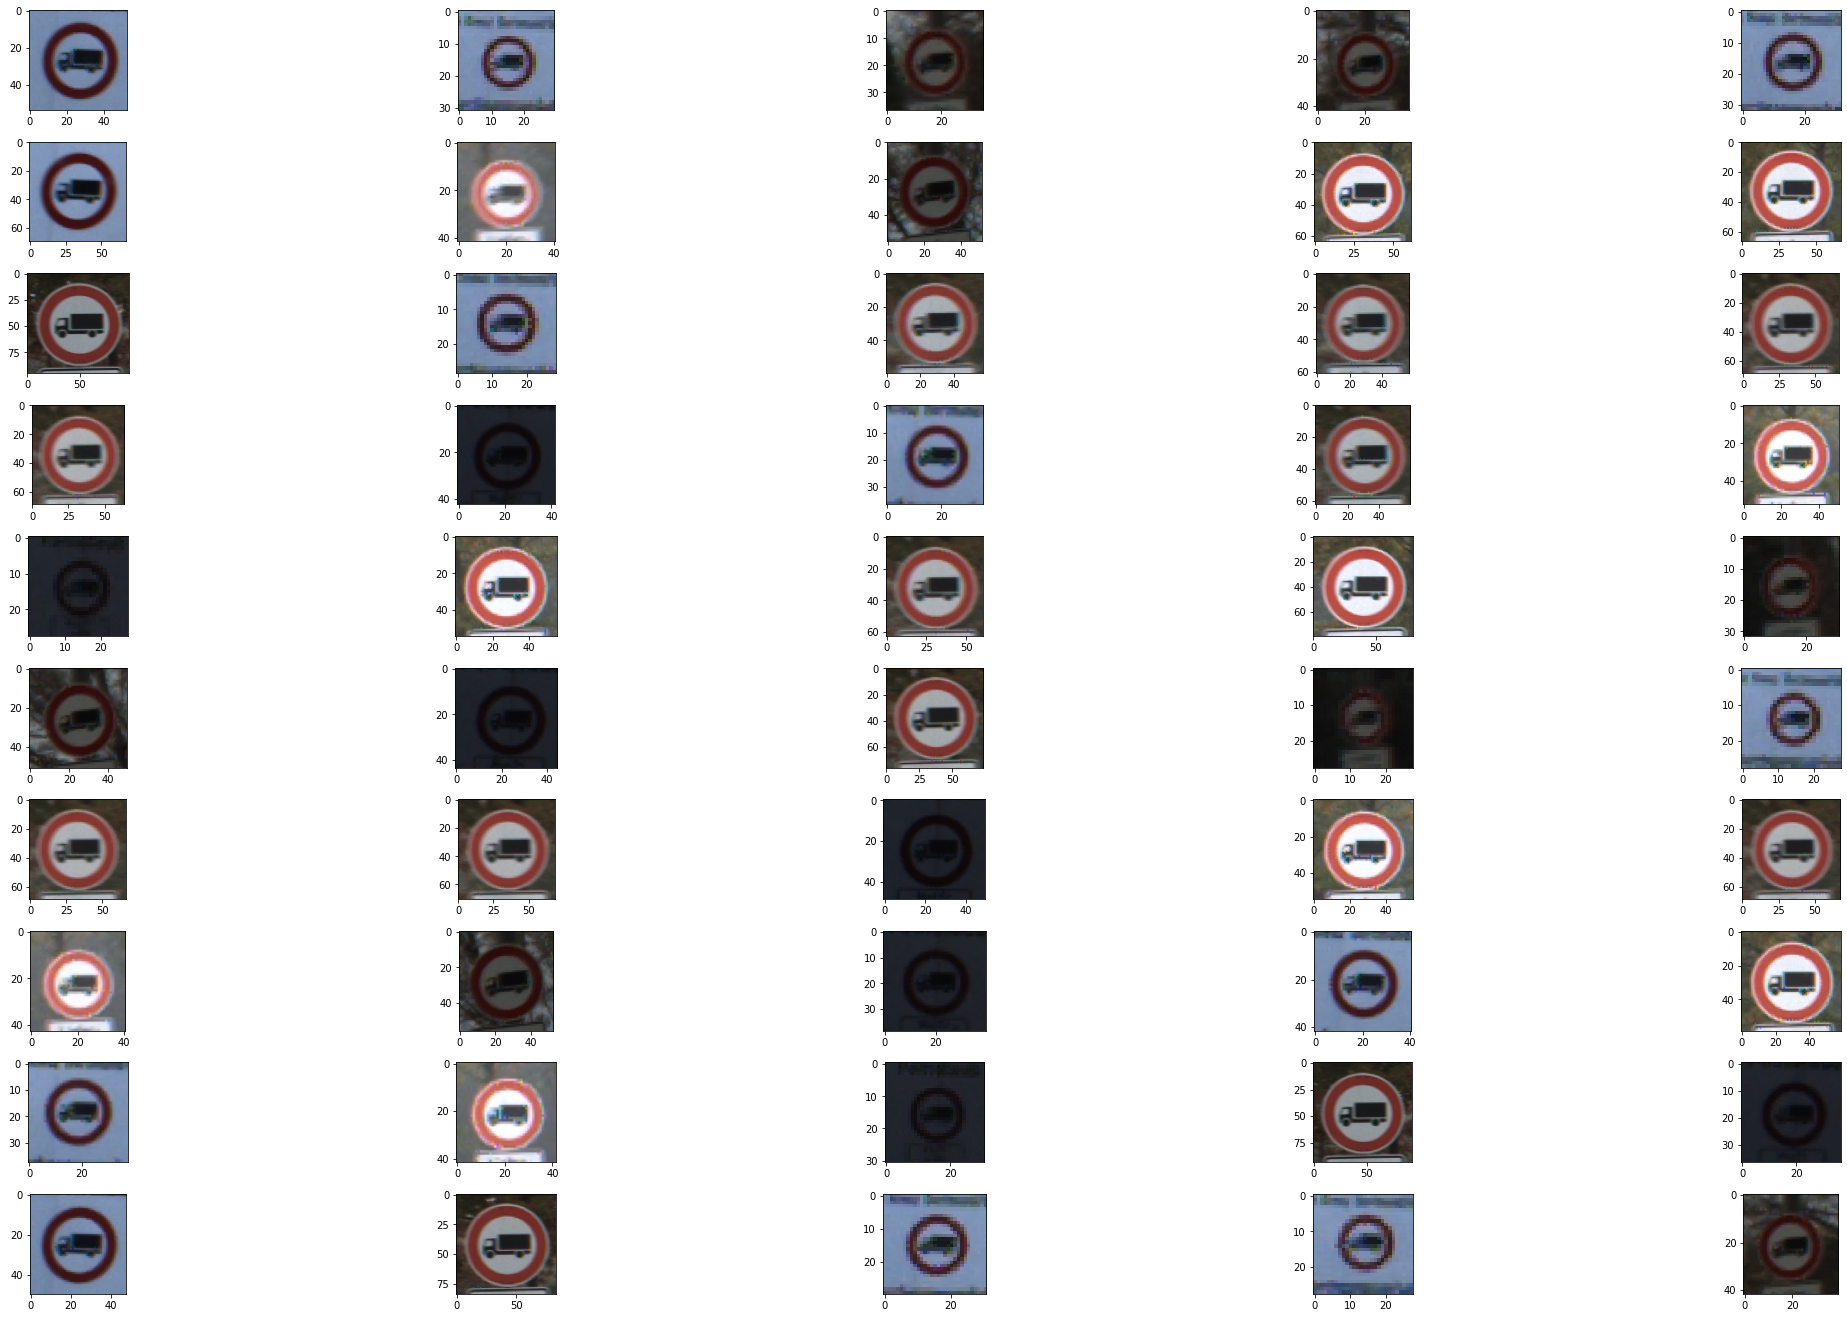

In [ ]:
images = []
for img_path in test_calc["Path"][:50]:
    images.append(mpimg.imread("/content/archive/"+img_path))
plt.figure(figsize=(30,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i+1)
    plt.tight_layout()
    plt.imshow(image)

***Random Sampling***

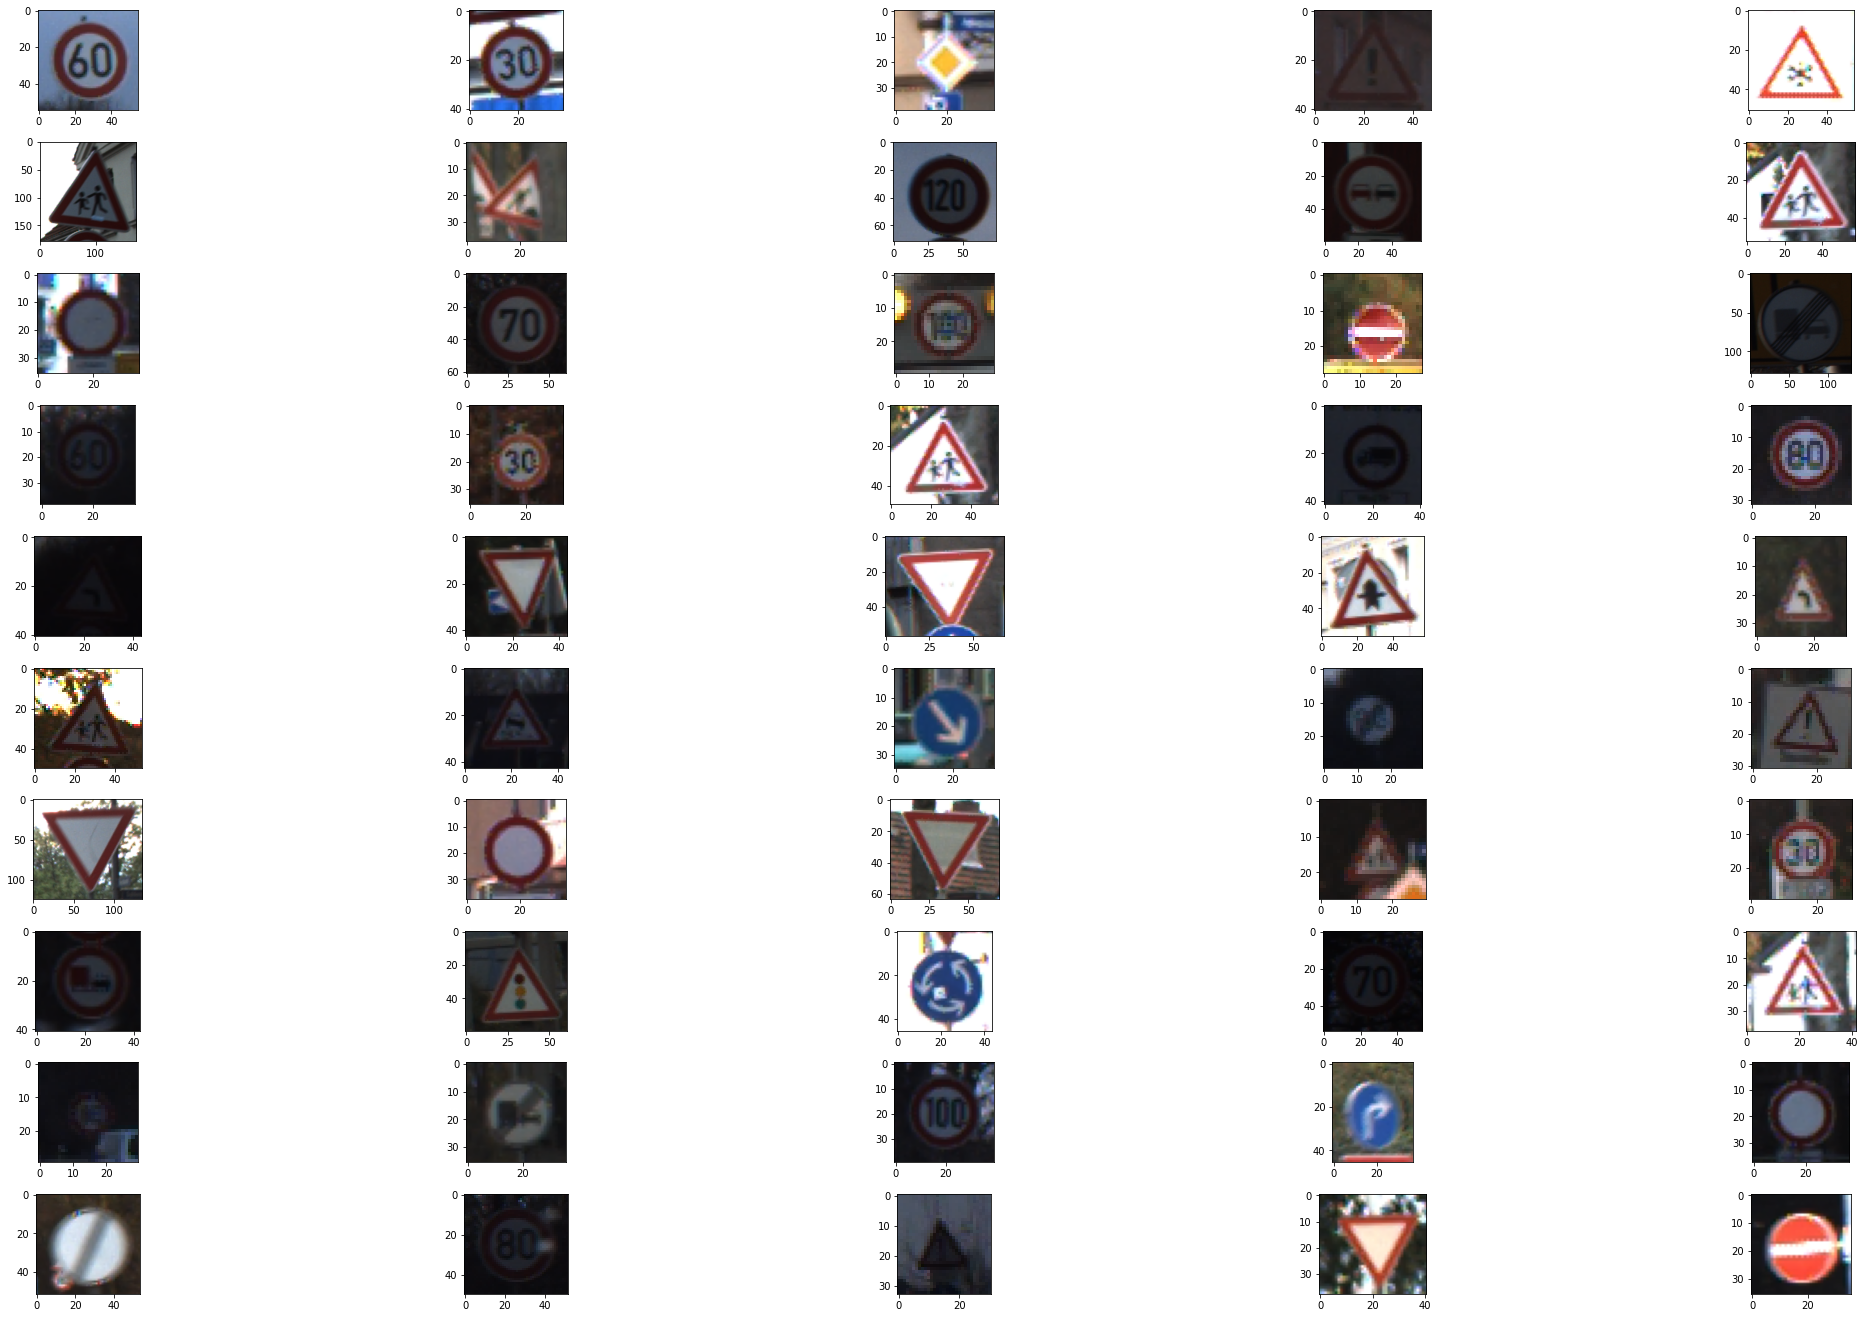

In [ ]:
import random
images = []
for img_path in random.sample(list(test_calc["Path"]),50):
    images.append(mpimg.imread("/content/archive/"+img_path))
plt.figure(figsize=(30,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i+1)
    plt.tight_layout()
    plt.imshow(image)

***Count of image for each class***

In [ ]:
val, cnt = np.unique(train_calc["ClassId"], return_counts=True)
pd.Series(cnt)
count_df = pd.DataFrame(columns=["ClassId", "Count"])
count_df["ClassId"] = val
count_df["Count"] = cnt
count_df = pd.merge(count_df, sign_df, on="ClassId", how="inner")
count_df

,ClassId,Count,SignName
0,0,210,Speed limit (20km/h)
1,1,2220,Speed limit (30km/h)
2,2,2250,Speed limit (50km/h)
3,3,1410,Speed limit (60km/h)
4,4,1980,Speed limit (70km/h)
5,5,1860,Speed limit (80km/h)
6,6,420,End of speed limit (80km/h)
7,7,1440,Speed limit (100km/h)
8,8,1410,Speed limit (120km/h)
9,9,1470,No passing


***Distribution of train data***

Text(0.5, 1.0, 'Traffic Sign_names Count for Train Data')

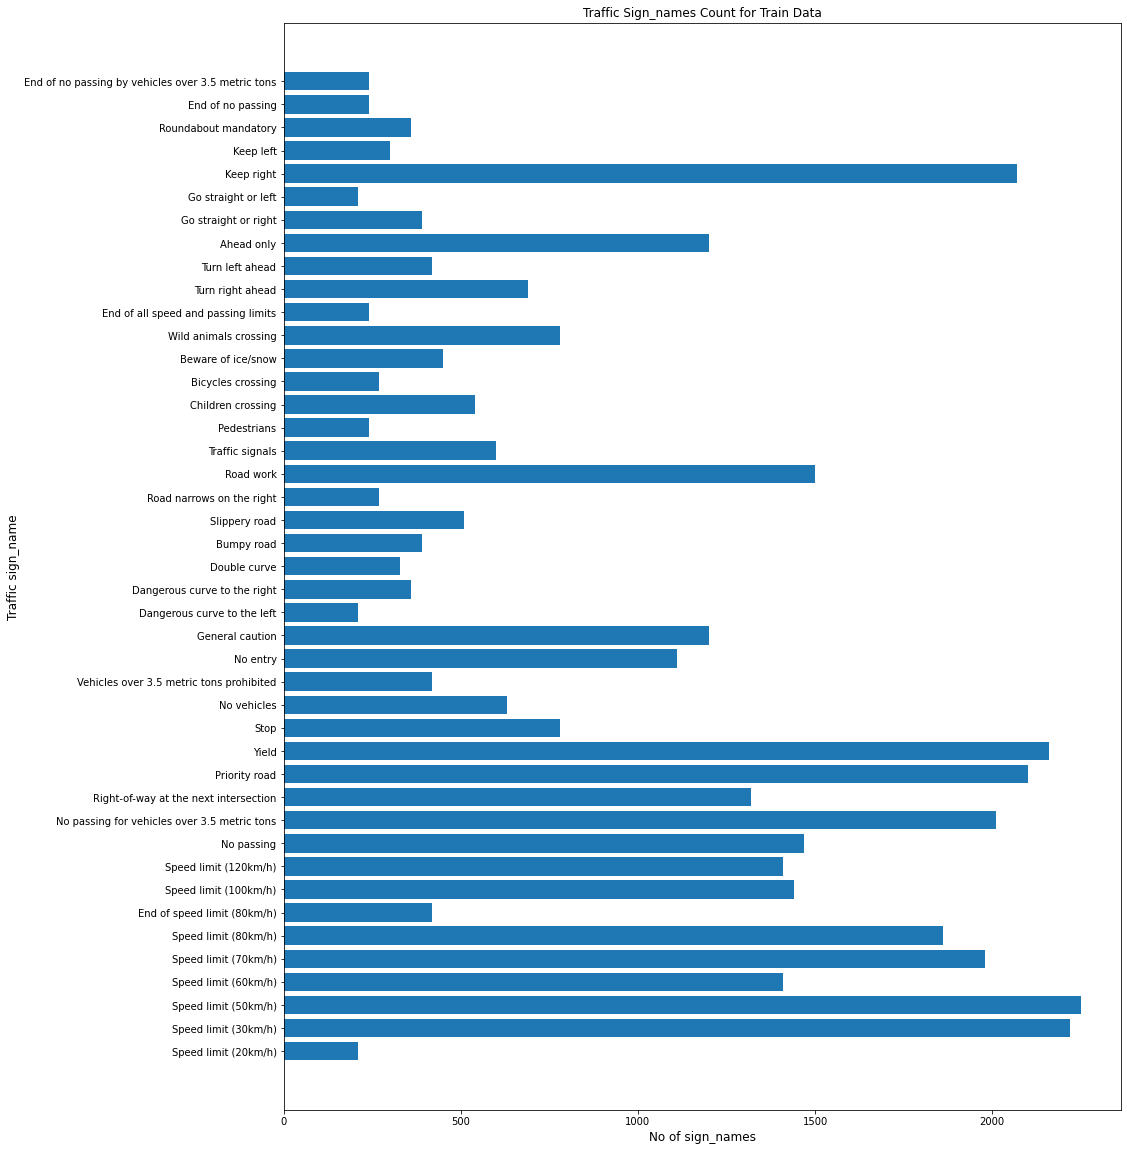

In [ ]:
plt.figure(figsize=(15,20))
plt.tight_layout()
plt.barh(count_df["SignName"], count_df["Count"])
plt.xlabel("No of sign_names", fontsize=12)
plt.ylabel("Traffic sign_name", fontsize=12)
plt.title("Traffic Sign_names Count for Train Data")

#### ***Creating blank dataframe to store model scores***

In [ ]:
df_scores  = pd.DataFrame(columns = ['Model', 'Score', 'Value'])
df_model = pd.DataFrame(columns = ['Model','Accuracy (%)','Time (mins)'])

## ***Random forest***

In [ ]:
from PIL import Image
from skimage.io import imread
import cv2
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

***Train and Test split***

In [ ]:
train_x=[]
train_x_vis=[]
p='/content/archive/'
for i in train_df['Path']:
    try:
        img = Image.fromarray(cv2.imread(p+i), 'RGB')
        train_x.append(np.array(img.resize((32, 32))))
    except AttributeError:
        print("Error in loading image")
train_x=np.array(train_x)
train_y = np.array(train_df['ClassId'].values)
train_x.shape

(39209, 32, 32, 3)

In [ ]:
test_x=[]
p='/content/archive/'
for i in test_df['Path']:
    try:
        img = Image.fromarray(cv2.imread(p+i), 'RGB')
        test_x.append(np.array(img.resize((32, 32))))
    except AttributeError:
        print("Error in loading image")
test_x=np.array(test_x)
test_y = np.array(test_df['ClassId'].values)
test_x.shape

(12630, 32, 32, 3)

#### ***Make a copy of train and test for CNN***

In [ ]:
train_x_cnn = np.copy(train_x)
train_y_cnn = np.copy(train_y)
test_x_cnn = np.copy(test_x)
test_y_cnn = np.copy(test_y)

#### ***Normalizing data for RandomForest and SVM***

In [ ]:
train_x.resize(39209,3072)
test_x.resize(12630,3072)

In [ ]:
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

***applying random forest***

In [ ]:
tree_list = [50,100,200]

In [ ]:
y_pred_list=[]
time_rf_list=[]
rf_accuracy=[]
for n in tree_list:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=121,criterion='entropy')
    tic = time.perf_counter()

    rf_clf.fit(train_x, train_y)
    toc = time.perf_counter()

    y_pred_list.append(rf_clf.predict(test_x))
    
    m_rf, s_rf = divmod((toc - tic), 60)
    time_rf_list.append(float(str(str(int(m_rf))+"."+str(int(m_rf)))))
    
    rf_accuracy.append(metrics.accuracy_score(test_y,rf_clf.predict(test_x)))

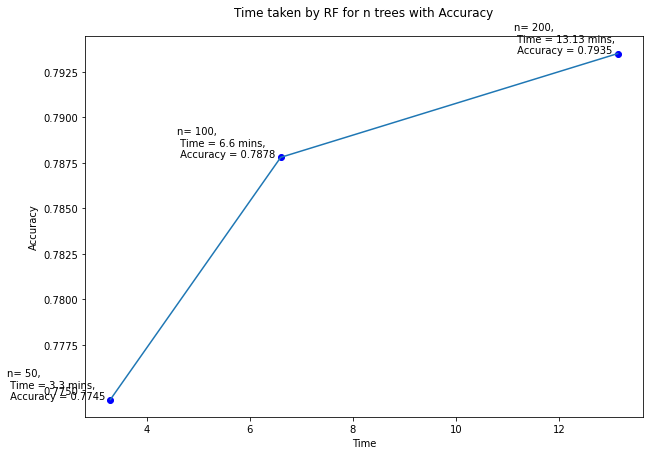

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.plot(time_rf_list,rf_accuracy,'bo')
ax.plot(time_rf_list,rf_accuracy)

ax.set_title('Time taken by RF for n trees with Accuracy',pad=20)
ax.set_xlabel('Time')  
ax.set_ylabel('Accuracy')

for x,y,i in zip(time_rf_list,rf_accuracy,tree_list):

    label = "n= {},\n Time = {} mins,\n Accuracy = {} ".format(i,round(x,4),round(y,4))
    ax.text(x-2,y,label, fontsize=10)
plt.show()  

#### ***Selecting best RF model***

In [ ]:
y_pred_rf = y_pred_list[2]
time_rf = time_rf_list[2]

acc_rf = rf_accuracy[2]
df_scores.loc[len(df_scores)] = ["RF","Accuracy",acc_rf]

df_model.loc[len(df_model)] = ["RF",acc_rf*100,time_rf]
acc_rf

0.793507521773555

#### ***Calculating recall, precision and f1 score for RF***

In [ ]:
recall_rf = metrics.recall_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","Recall",recall_rf]

precision_rf = metrics.precision_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","Precision",precision_rf]

f1_rf = metrics.f1_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","F1",f1_rf]

#### ***Classification report for RF***

In [ ]:
print("Classification report for RF classifier %s:\n%s\n"
      % (rf_clf, metrics.classification_report(test_y, y_pred_rf)))

Classification report for RF classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=121,
                       verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        60
           1       0.70      0.86      0.77       720
           2       0.60      0.76      0.67       750
           3       0.62      0.70      0.66       450
           4       0.73      0.80      0.76       660
           5       0.60      0.62      0.61       630
           6       0.68      0.

## ***Applying SVM***


In [ ]:
svm_clf = svm.NuSVC(nu=0.05,kernel='rbf',gamma=0.00001,random_state=121)

In [ ]:
tic = time.perf_counter()

svm_clf.fit(train_x, train_y)

toc = time.perf_counter()
m_svm, s_svm = divmod((toc - tic), 60)
time_svm=float(str(str(int(m_svm))+"."+str(int(m_svm))))

In [ ]:
y_pred_svm = svm_clf.predict(test_x)

In [ ]:
recall_svm = metrics.recall_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Recall",recall_svm]

precision_svm = metrics.precision_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Precision",precision_svm]

f1_svm = metrics.f1_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","F1",f1_svm]

acc_svm=metrics.accuracy_score(test_y,y_pred_svm)
df_scores.loc[len(df_scores)] = ["SVM","Accuracy",acc_svm]

df_model.loc[len(df_model)] = ["SVM",acc_svm*100,time_svm]
acc_svm

0.8256532066508313

In [ ]:
# Classification report for SVM
print("Classification report for SVM classifier %s:\n%s\n"
      % (svm_clf, metrics.classification_report(test_y, y_pred_svm)))

Classification report for SVM classifier NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
      max_iter=-1, nu=0.05, probability=False, random_state=121, shrinking=True,
      tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        60
           1       0.74      0.91      0.82       720
           2       0.82      0.91      0.86       750
           3       0.69      0.81      0.74       450
           4       0.78      0.81      0.79       660
           5       0.77      0.84      0.80       630
           6       0.67      0.47      0.55       150
           7       0.90      0.76      0.82       450
           8       0.86      0.85      0.85       450
           9       0.93      0.84      0.88       480
          10       0.91      0.95      0.93       660
          11       0.85      0.91      0.88       42

#### ***Model comparison***

In [ ]:
df_model 

,Model,Accuracy (%),Time (mins)
0,RF,79.350752,13.13
1,SVM,82.565321,34.34


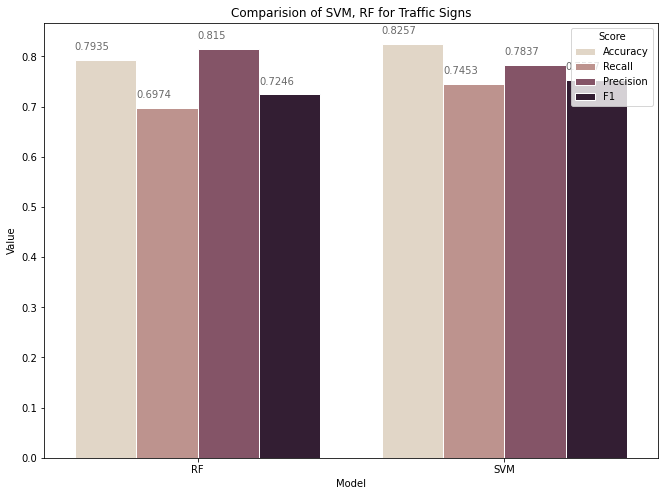

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(11,8))
ax = plt.axes()
ax = sns.barplot(x="Model", y="Value", hue="Score", data=df_scores, palette="ch:.25",edgecolor="1")
ax.set_title('Comparision of SVM, RF for Traffic Signs')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.02,str(round((i.get_height()), 4)), fontsize=10,color='dimgrey')
plt.show()

# ***Applying CNN***

#### ***Loding keras for CNN***

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical

#### ***Data for CNN***

In [ ]:
X = np.array(train_x_cnn)
Y = np.array(train_y_cnn)

#### ***Train and Test Split for CNN***
#### Validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('Shape of x_train: ', x_train.shape, ' and y_train:',y_train.shape)
print('Shape of x_test: ', x_test.shape, ' and y_test:',y_test.shape)
#one hot encoding the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Shape of x_train:  (31367, 32, 32, 3)  and y_train: (31367,)
Shape of x_test:  (7842, 32, 32, 3)  and y_test: (7842,)


#### ***Defining CNN and Compiling model***

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### ***Fitting CNN***

In [ ]:
epochs = 15
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 149s 304ms/step - loss: 0.4277 - accuracy: 0.8736 - val_loss: 0.1610 - val_accuracy: 0.9663
Epoch 2/15
491/491 [==============================] - 149s 303ms/step - loss: 0.3251 - accuracy: 0.9019 - val_loss: 0.0925 - val_accuracy: 0.9793
Epoch 3/15
491/491 [==============================] - 149s 303ms/step - loss: 0.2648 - accuracy: 0.9208 - val_loss: 0.0575 - val_accuracy: 0.9838
Epoch 4/15
491/491 [==============================] - 149s 303ms/step - loss: 0.2447 - accuracy: 0.9287 - val_loss: 0.0672 - val_accuracy: 0.9852
Epoch 5/15
491/491 [==============================] - 148s 302ms/step - loss: 0.1895 - accuracy: 0.9440 - val_loss: 0.0406 - val_accuracy: 0.9901
Epoch 6/15
491/491 [==============================] - 148s 302ms/step - loss: 0.1732 - accuracy: 0.9509 - val_loss: 0.0314 - val_accuracy: 0.9927
Epoch 7/15
491/491 [==============================] - 149s 303ms/step - loss: 0.1518 - accuracy: 0.9567 - val_loss: 0.0443 -

#### ***Epochs vs Accuracy***

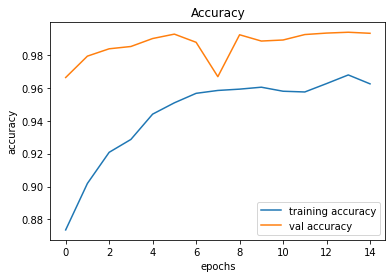

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

#### ***Epochs vs loss***

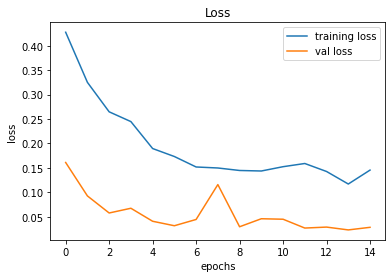

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#### ***Accuracy of testing data***

In [ ]:
test_y_cnn = to_categorical(test_y_cnn, 43)
model.evaluate(test_x_cnn, test_y_cnn)

395/395 [==============================] - 14s 35ms/step - loss: 0.1337 - accuracy: 0.9713


[0.13367515802383423, 0.9712588787078857]

In [ ]:
model.save('/content/drive/MyDrive/traffic_recognition.h5')